<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Session5/Session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.datasets import mnist
#importing image normalisation class
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


Usage of ImageDataGenerator class for Image normalisation
Load the dataset, configure the class, calculate image properties ,fit the model using generator & evaluate generator
pixel scaling using Imagedate generator class, Pixel Normalization, Pixel Centering, pixel standarisation
create and configure the data generator


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
print('Train', X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print('Test', X_test.min(), X_test.max(), X_test.mean(), X_test.std())


11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)
Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


(60000, 28, 28)


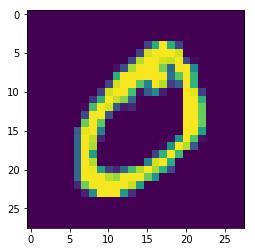

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])


In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print (X_train.shape)
#plt.figure(figsize=[5,5])


           




(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [8]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
y_train[:10]
plt
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print('Original label:', y_train[0])
print('After conversion to one-hot:', Y_train[0])

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (X_train.min(), X_train.max()))
print('Test min=%.3f, max=%.3f' % (X_test.min(), X_test.max()))
#Rescaling argument to a ratio by which each pixel can be multiplied to achieve [1 -255] range so 1/255.
# create generator with rescaling factor(1.0/255.0 = 0.003921568627451)
imagenormalize = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
imagenormalize.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (imagenormalize.mean, imagenormalize.std))
#iterators for using the normalisation on all the images in test and train datasets with epoch's
X_train_iterator = imagenormalize.flow(X_train, Y_train, batch_size=64)
X_test_iterator = imagenormalize.flow(X_test, Y_test, batch_size=64)
#confimring normalisation works


print('Batches train=%d, test=%d' % (len(X_train_iterator), len(X_test_iterator)))
# confirm the scaling works
#test_trainX, test_trainY = X_train_iterator.next()
#print('Batch shape=%s, min=%.3f, max=%.3f, mean=%.3f, std=%.3f' % (test_trainX.shape, test_trainX.min(), test_trainX.max(),test_trainX.mean(), test_trainX.std()))
# demonstrate effect on entire training dataset
#iterator = imagenormalize.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)
# get a batch
#test_trainX, test_trainY = X_train_iterator.next()
# pixel stats in the batch
#print(test_trainX.shape, test_trainX.mean(), test_trainX.std())
#Also adding the  l2 regularisation it reduces the accuracy from

Train min=0.000, max=255.000
Test min=0.000, max=255.000
Data Generator mean=33.318, std=78.567
Batches train=938, test=157


In [11]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.00001))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.00001))) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu',kernel_regularizer=regularizers.l2(0.00001))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4,kernel_regularizer=regularizers.l2(0.00001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

W0616 12:03:36.051872 139936721676160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """
W0616 12:03:36.101297 139936721676160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 12:03:36.110634 139936721676160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 12:03:36.162238 139936721676160 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        330       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), kernel_regularizer=<keras.reg...)`


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
938/938 [==============================] - 17s 18ms/step - loss: 0.1215 - acc: 0.9497 - val_loss: 0.0312 - val_acc: 0.9924
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
938/938 [==============================] - 14s 15ms/step - loss: 0.1148 - acc: 0.9520 - val_loss: 0.0290 - val_acc: 0.9933
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
938/938 [==============================] - 15s 16ms/step - loss: 0.1084 - acc: 0.9539 - val_loss: 0.0311 - val_acc: 0.9937
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
938/938 [==============================] - 14s 15ms/step - loss: 0.1085 - acc: 0.9517 - val_loss: 0.0273 - val_acc: 0.9947
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
938/938 [==============================] - 14s 15ms/step - loss: 0.1070 - acc: 0.9539

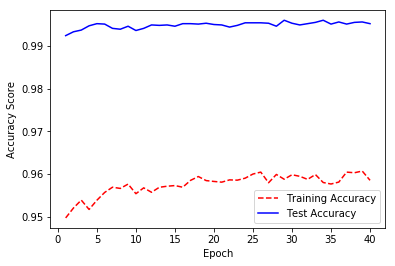

In [49]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
modelparams = model.fit_generator(X_train_iterator, steps_per_epoch=len(X_train_iterator), epochs=40, verbose=1, validation_data=(X_test_iterator),validation_steps=len(X_test_iterator), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

training_accuracy = modelparams.history['acc']
test_accuracy = modelparams.history['val_acc']
# Create count of the number of epochs
epoch_count = range(1, 41)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

# fit model with generator
#model.fit_generator(X_train_iterator, steps_per_epoch=len(X_train_iterator), epochs=5)
#model.fit(X_train_iterator, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Actually L2 regularisation decreased Acuracy from 99.5 to 99.4 for 20 epoch's
Putting L2 kernel regulariser as 0.0001 The accuracy does not increase but it converges slowly to 99.5 increased to 99.56 for 40 epoch's. Also increases training set , may be we need to write a rate ,l2 regularisation scheduler for each epoch



In [13]:
model.save("session.h5py")
score = model.evaluate_generator(X_test_iterator,steps=len(X_test_iterator),verbose=0)
print(score)

[0.03079214204251766, 0.9918]


(10000, 10)
(10000,) (10000,)
Found 966 correct labels


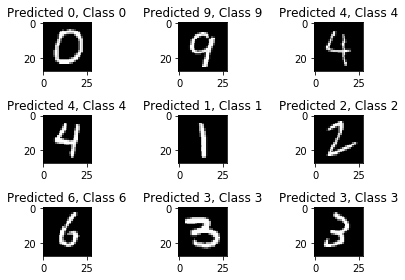

In [27]:
#https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
#Use this for misclassified images
predicted_classes = model.predict_generator(X_test_iterator,steps = len(X_test_iterator))
print (predicted_classes.shape)
# predictions are floating point values,round off the output which will convert the float values into an integer. np.argmax() 
#to select the index number which has a higher value in a row.
#predIdxs = np.argmax(predIdxs, axis=1)
#predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
test_classes = np.argmax(np.round(Y_test),axis =1)
print (predicted_classes.shape,test_classes.shape) #, 
correct = np.where(predicted_classes==test_classes)[0]
#print(correct)
print ("Found %d correct labels"%len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_classes[correct]))
    plt.tight_layout()

(9034,)
Found 9034 incorrect labels
3011


/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


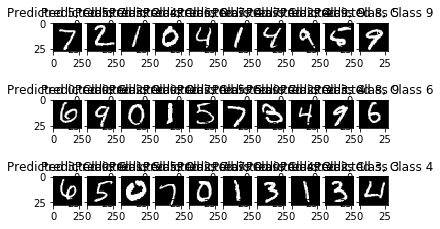

In [53]:
incorrect = np.where(predicted_classes!=test_classes)[0]
print (incorrect.shape)
print ("Found %d incorrect labels" %len(incorrect))
print(size_row)
for i, incorrect in enumerate(incorrect[:30]):
    plt.subplot(3,10,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_classes[incorrect]))
    plt.tight_layout()
